# <font size='10' color='#1ABC9C'> Model Testing </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
## When using the 'inline' backend, 
## your matplotlib graphs will be included in your notebook, next to the code.
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
import itertools
import time
import scipy.stats as stats
import statistics


pd.pandas.set_option('display.max_columns',None)

In [2]:
X_train=pd.read_csv('X_train.csv') 
X_test=pd.read_csv('X_test.csv')
y_train=pd.read_csv('y_train.csv')
y_test=pd.read_csv('y_test.csv')

print('X_train :- ',X_train.shape ,'\ny_train :- ',y_train.shape,'\nX_test :- ',X_test.shape,'\ny_test :- ',y_test.shape )

X_train :-  (3019, 13) 
y_train :-  (3019, 1) 
X_test :-  (1487, 13) 
y_test :-  (1487, 1)


#### 0.8195893918055237   -  ('creddebt', 'othdebt', 'default', 'homeown', 'address', 'cars', 'carvalue', '3', '4', '5')


In [3]:
X_train.drop('yrsempl', axis=1, inplace=True)
X_train.drop('jobsat', axis=1, inplace=True)
X_train.drop('2', axis=1, inplace=True)

X_train.shape

(3019, 10)

In [4]:
X_test.drop('yrsempl', axis=1, inplace=True)
X_test.drop('jobsat', axis=1, inplace=True)
X_test.drop('2', axis=1, inplace=True)

X_test.shape

(1487, 10)

## Check for Pearson Correlation between Predictors

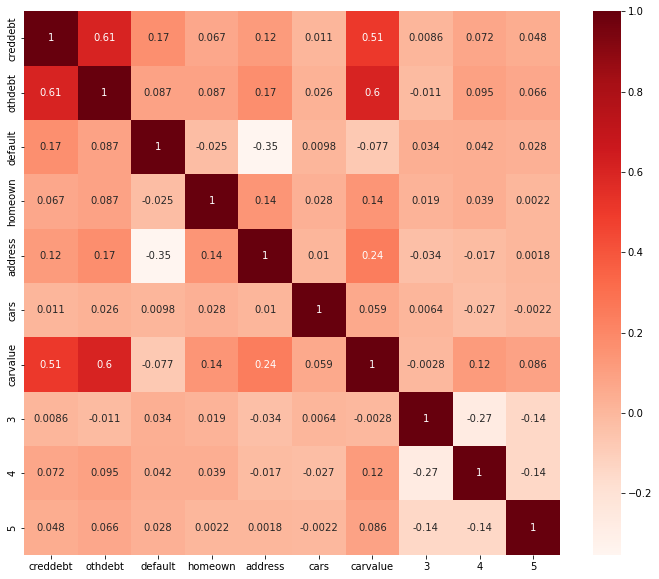

In [5]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

From our selected features only below features show strong correlation with each other 

creddebt & othdebt - 0.61

creddebt & carvalue - 0.51

othdebt & carvalue - 0.6








## Model 1 

In [6]:
TrainData = pd.concat((X_train[['creddebt', 'othdebt', 'default', 'homeown', 'address', 'cars', 'carvalue', '3', '4', '5']],y_train),axis=1)
TrainData.rename(columns = {'3':'edcat3'}, inplace = True)
TrainData.rename(columns = {'4':'edcat4'}, inplace = True)
TrainData.rename(columns = {'5':'edcat5'}, inplace = True)

model_1 =  smf.ols('income~creddebt+othdebt+default+homeown+address+cars+carvalue+edcat3+edcat4+edcat5',data=TrainData).fit()


In [7]:
print(model_1.summary())


                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     1338.
Date:                Sun, 06 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:09:29   Log-Likelihood:                 1054.4
No. Observations:                3019   AIC:                            -2087.
Df Residuals:                    3008   BIC:                            -2021.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8627      0.011    165.153      0.0

C:\Users\offic\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Test for Homoscedasticity')

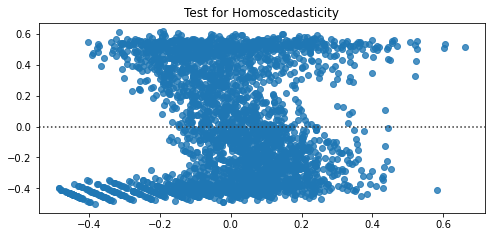

In [8]:
fig ,ax = plt.subplots(figsize=(8,3.5))
pred_val=model_1.fittedvalues.copy()
true_val=TrainData['income'].values.copy()
resid=true_val-pred_val
res=sns.residplot(resid,pred_val)
plt.title('Test for Homoscedasticity')

In [9]:
TrainData.to_csv('trainData.csv',index=False)